## **Import Relevant Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Datasets**

In [5]:
raw_data = pd.read_csv('Demographics_Data.csv')
raw_data.head()

,Sl. No.,State/UT,2020,2021,2022,2023
0,1,Andaman and Nicobar Islands,36.0,92,23,18
1,2,Andhra Pradesh,1654.0,9738,29450,29546
2,3,Arunachal Pradesh,5.0,2,2,17
3,4,Assam,8357.0,15634,40719,56448
4,5,Bihar,12447.0,23082,55751,79469


In [6]:
df = raw_data.copy()
df.head()

,Sl. No.,State/UT,2020,2021,2022,2023
0,1,Andaman and Nicobar Islands,36.0,92,23,18
1,2,Andhra Pradesh,1654.0,9738,29450,29546
2,3,Arunachal Pradesh,5.0,2,2,17
3,4,Assam,8357.0,15634,40719,56448
4,5,Bihar,12447.0,23082,55751,79469


## **Data Cleaning and Preprocessing**

In [7]:
df.describe()

,Sl. No.,2020,2021,2022,2023
count,33.00000,32.000000,33.000000,33.000000,33.000000
mean,17.00000,3896.281250,10049.545455,31064.181818,42293.969697
std,9.66954,6299.255154,14395.091701,40695.752489,57248.984198
min,1.00000,1.000000,1.000000,2.000000,6.000000
25%,9.00000,86.500000,327.000000,1008.000000,1003.000000
50%,17.00000,1425.500000,4643.000000,14053.000000,19096.000000
75%,25.00000,5627.250000,10427.000000,40719.000000,64382.000000
max,33.00000,31268.000000,66705.000000,162862.000000,249223.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   33 non-null     int64  
 1   State/UT  33 non-null     object 
 2   2020      32 non-null     float64
 3   2021      33 non-null     int64  
 4   2022      33 non-null     int64  
 5   2023      33 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ KB


In [9]:
df.isnull().sum()

,0
Sl. No.,0
State/UT,0
2020,1
2021,0
2022,0
2023,0


In [10]:
df.fillna(0,inplace=True)

In [11]:
df.columns

Index(['Sl. No.', 'State/UT', '2020', '2021', '2022', '2023'], dtype='object')

## **Analysis of Data**

### **Total EV sales per Year**

In [12]:
total_sales_per_year = df[['2020', '2021', '2022', '2023']].sum()
total_sales_per_year

,0
2020,124681.0
2021,331635.0
2022,1025118.0
2023,1395701.0


### **year-on-year growth in Ev Sales(Percentage)**

In [13]:
growth_2020_2021 = ((total_sales_per_year['2021'] - total_sales_per_year['2020']) / total_sales_per_year['2020']) * 100
growth_2021_2022 = ((total_sales_per_year['2022'] - total_sales_per_year['2021']) / total_sales_per_year['2021']) * 100
growth_2022_2023 = ((total_sales_per_year['2023'] - total_sales_per_year['2022']) / total_sales_per_year['2022']) * 100


### **State-Wise Average Sales**

In [14]:
print(growth_2020_2021)
print(growth_2021_2022)
print(growth_2022_2023)

165.9867983092853
209.11031706544847
36.15027733392643


In [15]:
state_wise_avg_sales = df[['2020', '2021', '2022', '2023']].mean(axis=1)

state_wise_avg_sales.values

array([4.225000e+01, 1.759700e+04, 6.500000e+00, 3.028950e+04,
       4.268725e+04, 2.394250e+03, 1.579575e+04, 4.120775e+04,
       3.875750e+03, 4.096200e+04, 1.624275e+04, 6.297500e+02,
       3.683000e+03, 9.508750e+03, 6.999275e+04, 2.983775e+04,
       1.850000e+01, 2.806675e+04, 8.789675e+04, 2.362500e+02,
       4.000000e+01, 4.550000e+01, 5.500000e+00, 1.870375e+04,
       1.094750e+03, 1.072650e+04, 4.842050e+04, 4.673300e+04,
       3.958250e+03, 8.400000e+01, 1.275145e+05, 9.652500e+03,
       1.133400e+04])

## **Visualization**

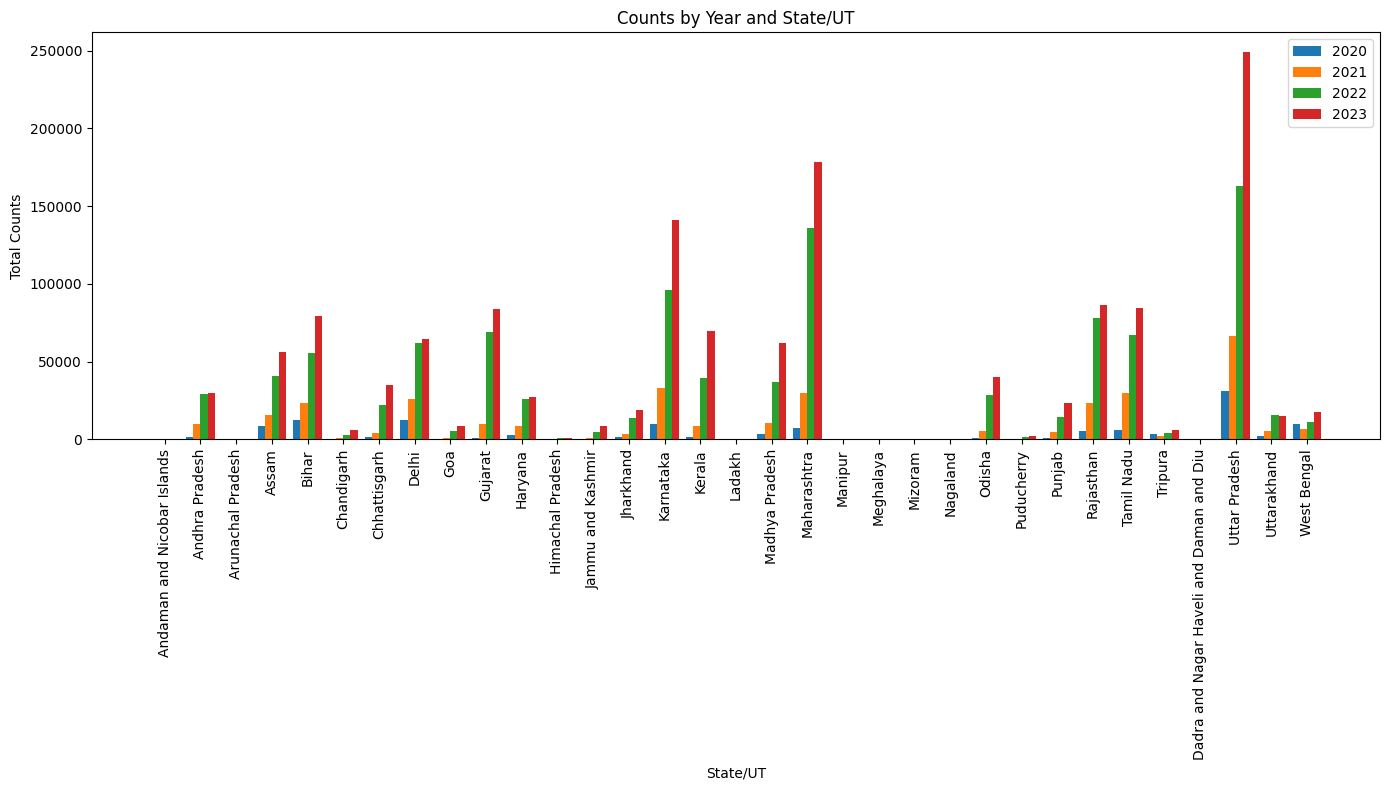

In [16]:
# Plotting a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.2  # the width of the bars

x = np.arange(len(df['State/UT']))  # the label locations

ax.bar(x - 1.5*width, df['2020'], width, label='2020')
ax.bar(x - 0.5*width, df['2021'], width, label='2021')
ax.bar(x + 0.5*width, df['2022'], width, label='2022')
ax.bar(x + 1.5*width, df['2023'], width, label='2023')

# Add labels and title
ax.set_ylabel('Total Counts')
ax.set_xlabel('State/UT')
ax.set_title('Counts by Year and State/UT')
ax.set_xticks(x)
ax.set_xticklabels(df['State/UT'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


## **EV sales Per Years**

In [17]:
raw_data1= pd.read_csv('EV Sales Per years.csv')
raw_data1.head()

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615


In [18]:
df1=raw_data1.copy()

## **Visualization of Data**

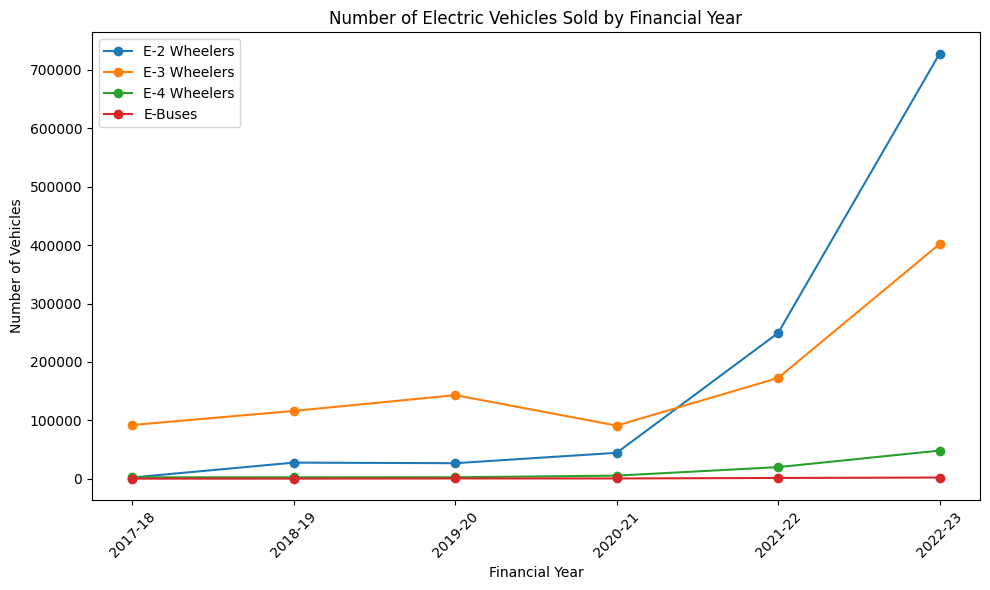

In [19]:
plt.figure(figsize=(10, 6))
categories = df1['category'].unique()

for category in categories:
    plt.plot(df1[df1['category'] == category]['financial_year'],
             df1[df1['category'] == category]['num_vehicles'],
             marker='o', label=category)

# Adding Titles and Labels
plt.title('Number of Electric Vehicles Sold by Financial Year')
plt.xlabel('Financial Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend()

# Show Plot
plt.tight_layout()
plt.show()

## **Two Wheeler Sales Per years**

In [20]:
raw_data3 = pd.read_csv("Ev_2_Wheeler_Sales_by_years.csv")
raw_data3.head()

,type,financial_year,month,num_vehicles
0,E-2 Wheelers,2017-18,Apr,96
1,E-2 Wheelers,2017-18,May,91
2,E-2 Wheelers,2017-18,Jun,137
3,E-2 Wheelers,2017-18,Jul,116
4,E-2 Wheelers,2017-18,Aug,99


In [21]:
df3=raw_data3.copy()

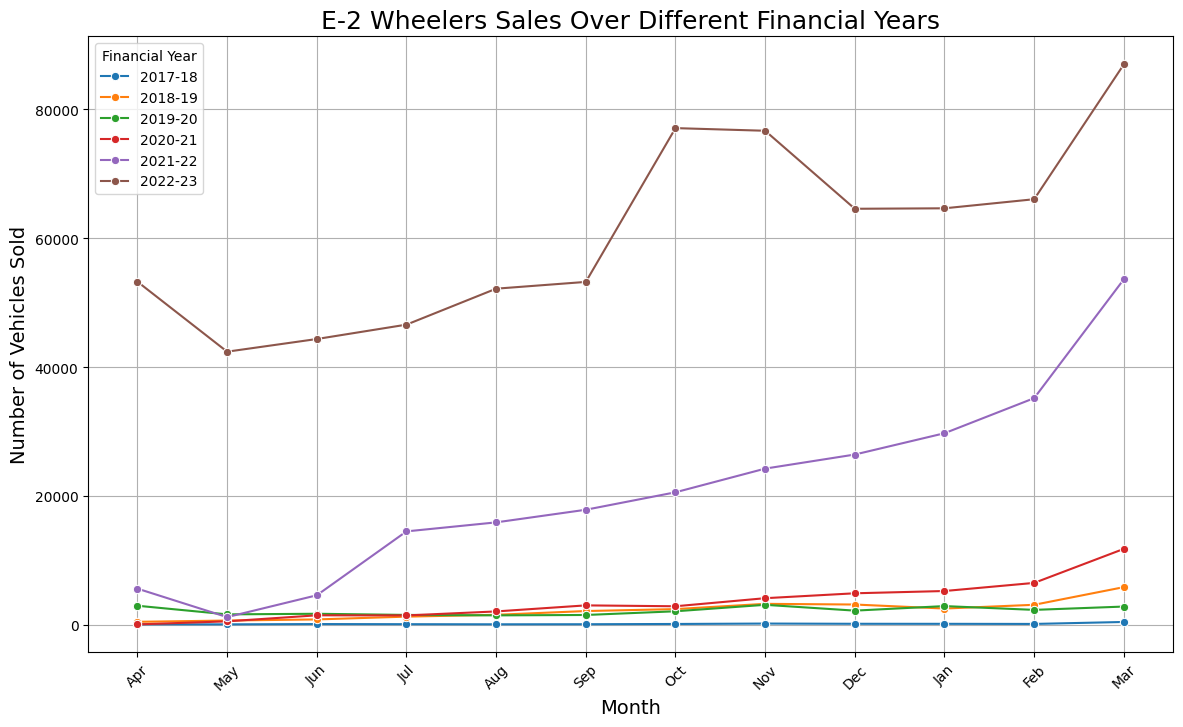

In [22]:

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='num_vehicles', hue='financial_year', data=df3, marker='o')

# Customize the plot
plt.title('E-2 Wheelers Sales Over Different Financial Years', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Vehicles Sold', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Financial Year')
plt.grid(True)

# Show the plot
plt.show()
